## Utilizando imágenes en nuestros programas Python

Para poder manejar imágenes tenemos que utilizar un paquete externo, Python Imaging Library (PIL). De momento nos basta con utilizar el objeto `Image`. 

In [1]:
from PIL import Image

### Abrir, crear, ver

Podemos leer una fotografía que se encuentre en nuestro ordenador (lo más fácil es colocar las imágenes en el mismo directorio en el que estamos trabajando). Si quieres utilizar las mismas imágenes de ejemplo
que aparecen a continuación, puedes bajartelas en los siguientes enlaces:
 * <a href="http://wild.mat.ucm.es/img/beach.png">http://wild.mat.ucm.es/img/beach.png</a>
 * <a href="http://wild.mat.ucm.es/img/beach_grey.png">http://wild.mat.ucm.es/img/beach_grey.png</a>

In [2]:
i = Image.open('beach.png','r')      # imagen en color 
j = Image.open('beach_grey.png','r') # imagen en escala de grises

Una imagen es esencialmente una matriz de datos. Los elementos de la matriz indican el color que tienen los puntos (píxeles) que forman la imagen (<a href='http://es.wikipedia.org/wiki/P%C3%ADxel'>http://es.wikipedia.org/wiki/Píxel</a>).

Las variables `i` y `j` que hemos definido arriba, por ser imágenes, tiene múltiples propiedades y funciones, algunas muy útiles son las siguientes:

In [3]:
i.size, i.format_description, i.getbands()

((600, 450), 'Portable network graphics', ('R', 'G', 'B'))

Que nos indican, que `i` tiene una fotografía de 600 por 450 píxeles; que el formato utilizado es png (habitualmente esto también lo indica la extensión del archivo); y que la imagen es de tipo RGB (del inglés Red, Green, Blue), es decir, cada píxel es una terna que tiene una codificación de color usando valores para rojo, verde y azul.

En el caso de la imágen contenida en la variable `j`:

In [4]:
j.size, j.format_description, j.getbands()

((600, 450), 'Portable network graphics', ('L',))

Es una fotografía de 600 por 450 píxeles con formato png de tipo L (escala de grises). Si la fotografía es en blanco y negro, el *color* viene definido por un único número, 0 es negro, 255 es blanco y los valores intermedios indican distintos tonos de grises.

Podemos, por suspuesto, ver las imágenes:

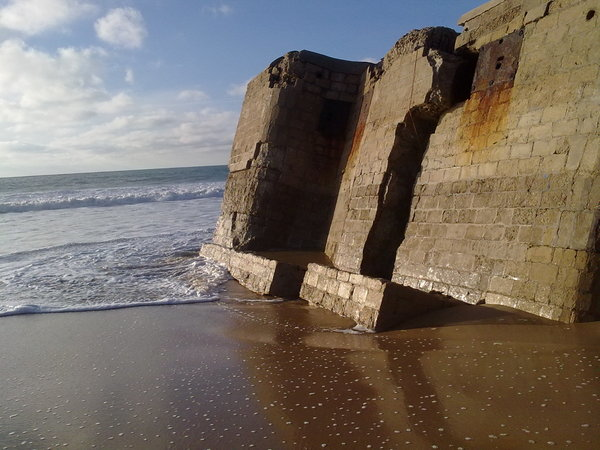

In [5]:
i

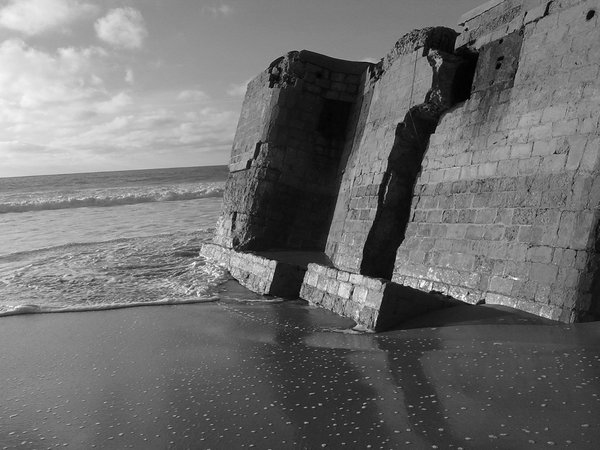

In [6]:
j

También se pueden grabar las imágenes

In [ ]:
i.save('nombre_que_quieras.png')

También podemos crear nuestras propias imágenes. Tenemos que indicar:
* **Formato**, sólo usaremos "RGB" para imágenes en color y "L" para imágenes en escala de grises.
* **Dimensión**, una tupla con el ancho y el alto de la imagen en píxeles. 
* **Color**, un color, bien un número entre 0 y 255 para los grises o una terna de números entre 0 y 255 para las imágenes en color. 

(Si no entiendes bien la codificación de colores en RGB echa un vistazo en la wikipedia <a href='http://es.wikipedia.org/wiki/RGB'>http://es.wikipedia.org/wiki/RGB</a>, en particular la sección titulada *Uso de RGB en HTML y en lenguajes de programación*.)

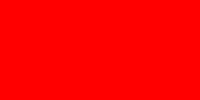

In [8]:
img = Image.new("RGB", (200,100), (255,0,0)) # tipo RGB, tamaño, color
img

Que da como resultado una imagen completamente roja (255,0,0)

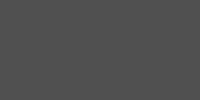

In [11]:
img = Image.new("L", (200,100), 80) # tipo escala grises, tamaño, nivel de gris
img

Que da como resultado una imagen de 200x100 con un color gris oscuro (80)

### Dibujos sencillos

Vamos a crear algunas imágenes con dibujos sencillos: líneas horizontales, verticales, diagonales...

¿Cómo podríamos crear esta imagen? <br>
<img src='files/img/line_h-red_200x100.png'>

Podríamos partir de una imagen inicial como la que hemos creado antes y añadir la línea verde. Para ello tenemos que poder acceder a cada uno de los píxeles que forman parte de la imagen. 

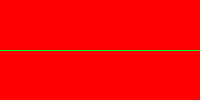

In [13]:
img = Image.new("RGB", (200,100), (255,0,0))
for x in range(200):
    img.putpixel((x,50),(0,255,0))
img

Como es fácil adivinar, las imágenes tienen una función `putpixel` que tiene dos parámetros, el primero es la posición del píxel que queremos cambiar, en nuestro ejemplo los pares (x,50), y el color que le queremos dar a ese pixel, en nuestro ejemplo el color verde (0,255,0). 

Si en lugar de líneas horizontales las queremos dibujar verticales, (lo hacemos esta vez con imágenes en blanco y negro)<br>
<img src='files/img/line_v-grey80_200x100.png'>

la solución es muy parecida. 

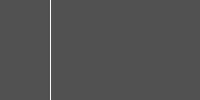

In [15]:
img = Image.new("L", (200,100), 80)
for y in range(100):
    img.putpixel((50,y), 255)
img

También es muy fácil modificar imágenes ya existentes, la siguiente función añade una línea horizontal en una imagen.

In [20]:
def line_h(img, color):
    """
    Draw an horizontal line in the middle of the image 'img' of color 'color'
    @type img: PIL.Image
    @type color: either a number between 0..255 (gray) or a 3-tuple (r,g,b)
    """
    width, height = img.size
    for x in range(width):
        img.putpixel((x,height//2),color)

Probamos la función con una imagen en color y con otra en escala de grises

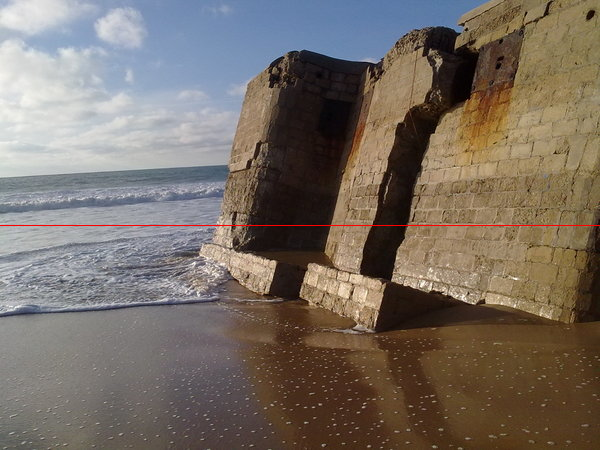

In [22]:
i = Image.open('beach.png','r')      # imagen en color 
line_h(i,(255,0,0))
i

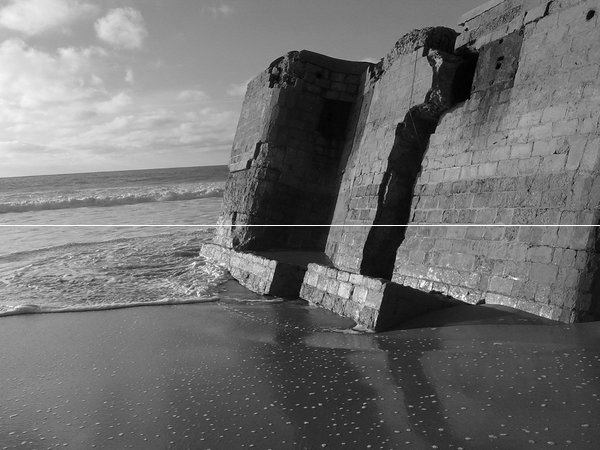

In [23]:
j = Image.open('beach_grey.png','r') # imagen en escala de grises
line_h(j,255)
j

## Ejercicios

Te proponemos algunas imágenes para que encuentres la función que puede generar esos resultados. Están ordenadas por nivel de dificultad, más o menos. 

* Rayas<br> <img width="300" height="225" src='files/img/mline_h.png'>
* Cuadrícula<br><img width="300" height="225" src='files/img/mline_hv.png'>
* Diagonales (en un cuadrado)<br><img src='files/img/cross.png'>
* Diagonales (en un rectángulo) <br><img src='files/img/diagonals.png'>
* Líneas con diferente pendiente <br> <img src='files/img/lines.png'>
* Sinusoides (no todo son rectas!)<br><img src='files/img/sines.png'>

También puedes *crearte* tus propios ejercicios, piensa en imágenes que te gustaria generar/transformar...